In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # 0 = all logs, 1 = filter INFO, 2 = filter WARNING, 3 = only ERROR

In [2]:
import numpy as np
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.api.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.api.models import Sequential
from keras.api.applications import VGG16
from keras.api.optimizers import Adam
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

# Define new dataset path
#train_dir = r"D:\sdp\redd\train"
#test_dir = r"D:\sdp\redd\test"
train_dir = r"/workspace/sdp/redd/train"
test_dir = r"/workspace/sdp/redd/test"
print("w")

E0000 00:00:1744015464.288060    1036 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744015464.291826    1036 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


w


In [3]:
# Data Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1. / 255)

# Load Training & Testing Data
training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 15000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [4]:
# Load Pretrained VGG16 Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Freeze the base model

# Define Model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

I0000 00:00:1744015471.953775    1036 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3620 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 6GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,879,299 (56.76 MB)

 Trainable params: 164,611 (643.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [5]:
import pickle
import tensorflow as tf

epochs = 5
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=epochs
)
model.save("first_model_da.h5")
with open("history1_da.pkl", "wb") as f:
    pickle.dump(history.history, f)

print("Model and training history saved successfully!")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


I0000 00:00:1744015477.029038    1155 service.cc:148] XLA service 0x7f65a0006cb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744015477.029091    1155 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
I0000 00:00:1744015477.308563    1155 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/469 ━━━━━━━━━━━━━━━━━━━━ 30s 66ms/step - accuracy: 0.3203 - loss: 1.1866   

I0000 00:00:1744015485.317519    1155 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 204s 416ms/step - accuracy: 0.5110 - loss: 0.9528 - val_accuracy: 0.8237 - val_loss: 0.4554
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 180s 383ms/step - accuracy: 0.7377 - loss: 0.5790 - val_accuracy: 0.8567 - val_loss: 0.3476
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 183s 390ms/step - accuracy: 0.7859 - loss: 0.4788 - val_accuracy: 0.8830 - val_loss: 0.2967
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 179s 381ms/step - accuracy: 0.8064 - loss: 0.4407 - val_accuracy: 0.8920 - val_loss: 0.2712
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 187s 399ms/step - accuracy: 0.8240 - loss: 0.4131 - val_accuracy: 0.8943 - val_loss: 0.2633


Model and training history saved successfully!


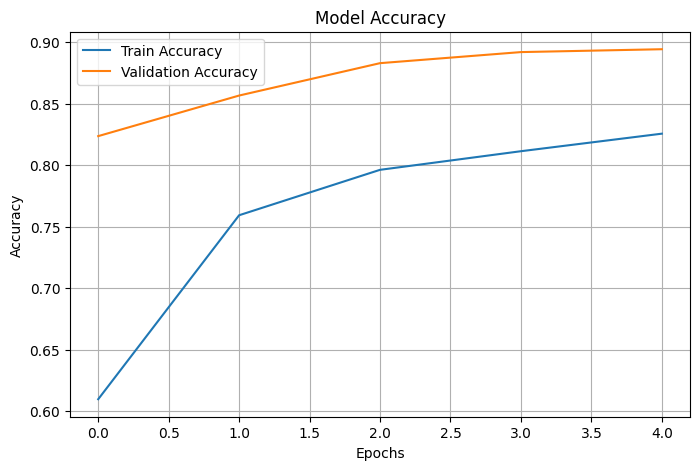

In [8]:
import matplotlib.pyplot as plt  # ✅ Correct
def plot_accuracy(history):
    plt.figure(figsize=(8, 5))  # Set figure size
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend()
    plt.grid()
    plt.show(block=True)  # Force displayy

plot_accuracy(history)

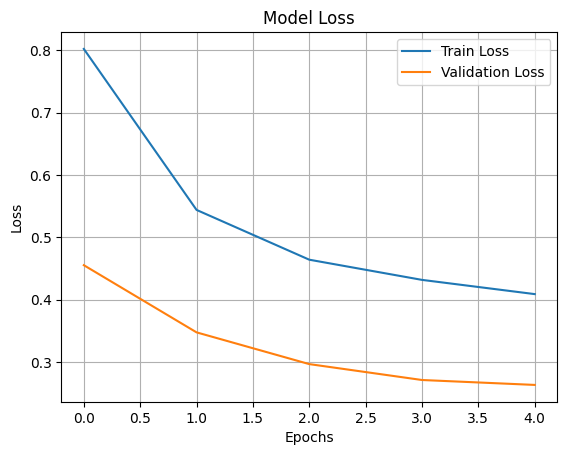

In [9]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend()
    plt.grid()
    plt.show()
plot_loss(history)

In [31]:
test_loss, test_accuracy = model.evaluate(test_set)
print(f"\n🔹 Test Accuracy after initial training: {test_accuracy * 100:.2f}%")

94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 236ms/step - accuracy: 0.8951 - loss: 0.2760

🔹 Test Accuracy after initial training: 89.43%


In [32]:
# Fine-Tuning (Unfreeze last 10 layers)
base_model.trainable = True
for layer in base_model.layers[:-10]:  # Keep first layers frozen
    layer.trainable = False

In [33]:
from keras.api.optimizers import Adam

fine_tune_epochs = 2
# Reduce learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune
history_fine = model.fit(
    training_set,
    validation_data=test_set,
    epochs=fine_tune_epochs, verbose=2
)
model.save("first_model-tf.h5")
with open("history-f.pkl", "wb") as f:
    pickle.dump(history.history, f)

Epoch 1/2
469/469 - 204s - 435ms/step - accuracy: 0.8912 - loss: 0.2648 - val_accuracy: 0.9453 - val_loss: 0.1433
Epoch 2/2
469/469 - 184s - 393ms/step - accuracy: 0.9319 - loss: 0.1759 - val_accuracy: 0.9670 - val_loss: 0.0894


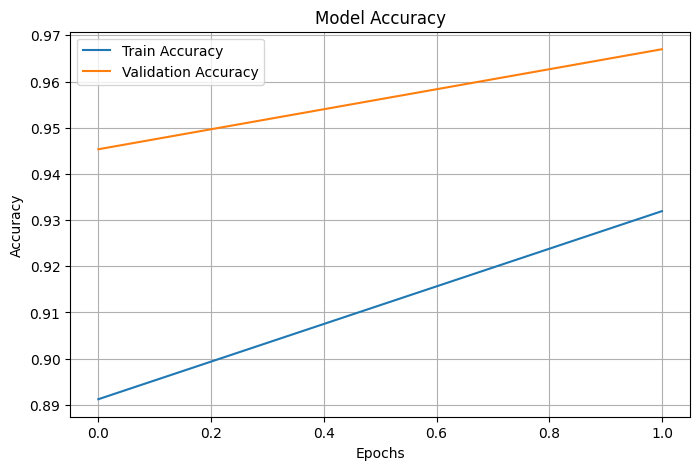

In [34]:
def plot_accuracy(history):
    plt.figure(figsize=(8, 5))  # Set figure size
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend()
    plt.grid()
    plt.show(block=True)  # Force displayy

plot_accuracy(history_fine)

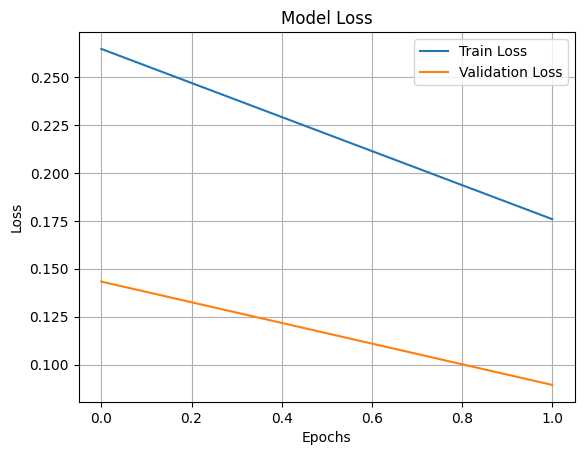

In [36]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend()
    plt.grid()
    plt.show()


plot_loss(history_fine)

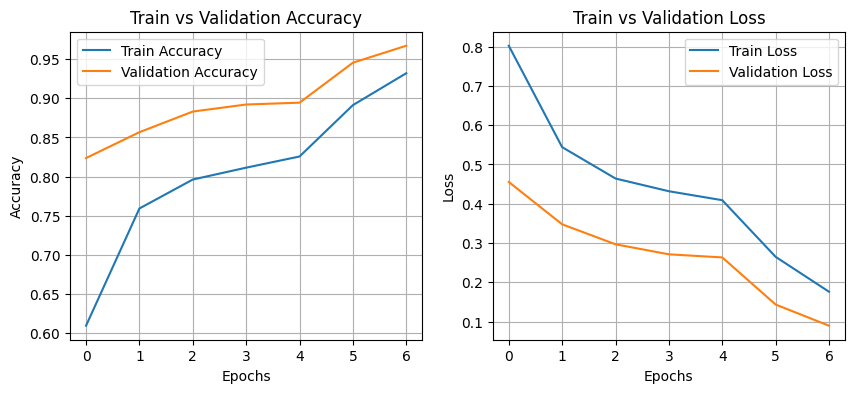

In [40]:
import pickle
import matplotlib.pyplot as plt

# Function to compare training and fine-tuning performance
def plot_fine_tuning(history, history_fine):
    # Access history dictionaries
    h1 = history.history
    h2 = history_fine.history

    # Combine accuracy
    acc = h1['accuracy'] + h2['accuracy']
    val_acc = h1['val_accuracy'] + h2['val_accuracy']

    # Combine loss
    loss = h1['loss'] + h2['loss']
    val_loss = h1['val_loss'] + h2['val_loss']

    epochs_range = range(len(acc))

    # Plot Accuracy
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.legend()
    plt.grid()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss')
    plt.legend()
    plt.grid()

    plt.show()

# Call the function
plot_fine_tuning(history, history_fine)


In [55]:
# Load and Predict a Single Image
test_image = image.load_img('/workspace/sdp/test/processed_img1.png', target_size=(150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0

result = model.predict(test_image)
class_index = np.argmax(result[0])
class_labels = {0: 'cat', 1: 'dog', 2: 'human'}
prediction = class_labels[class_index]

print(f"\n🟢 Prediction: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step

🟢 Prediction: dog


In [54]:
from keras.api.models import load_model
from keras_preprocessing.image import ImageDataGenerator

loaded_model = load_model('first_model-tf.h5')

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

test_generator = test_datagen.flow_from_directory(
     r"/workspace/sdp/redd/test",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model
loss, accuracy = loaded_model.evaluate(test_generator)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Loss: {loss:.4f}")

import numpy as np
from sklearn.metrics import classification_report

y_true = test_generator.classes

y_pred_probs = loaded_model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

class_labels = list(test_generator.class_indices.keys())

print(classification_report(y_true, y_pred, target_names=class_labels))

Found 3000 images belonging to 3 classes.
94/94 ━━━━━━━━━━━━━━━━━━━━ 23s 224ms/step - accuracy: 0.9408 - loss: 0.1617
Accuracy: 96.70%
Loss: 0.0894
94/94 ━━━━━━━━━━━━━━━━━━━━ 23s 229ms/step
              precision    recall  f1-score   support

         cat       0.97      0.93      0.95      1000
         dog       0.94      0.97      0.95      1000
       human       1.00      1.00      1.00      1000

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000

